In [2]:
from dw3d import open_mesh_multitracker,DCEL_Data
import skimage.io as io 
from foambryo import plot_tension_inference

fname = "../data/Meshes/Benchmark_original_mesh.rec"

verts,faces_mm,_ = open_mesh_multitracker(fname)
Mesh = DCEL_Data(verts,faces_mm)
plot_tension_inference(Mesh)

/Users/sachaichbiah/Documents/PHD/Gitlab/pip_libraries/delaunay-watershed/src/dw3d/Curvature.py:322: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residules, rank, singval = np.linalg.lstsq(A,f)


Extremas of the Surface Tensions plotted :  0.5727549802952757 1.5848558673896724


# Force inference from a pre-existing multimaterial mesh

In [4]:
from foambryo import plot_tension_inference,plot_valid_junctions,plot_residual_junctions, plot_force_inference
from dw3d import open_mesh_multitracker,DCEL_Data
v,f, _ = open_mesh_multitracker("../data/Meshes/Phallusia_Guignard_et_al.rec")
Mesh = DCEL_Data(v,f)
plot_tension_inference(Mesh, scattered = True, scatter_coeff=0.3)
#OR: 
#plot_force_inference(Mesh) #This can take some time, up to 20 min. 
#plot_valid_junctions(Mesh)
#plot_residual_junctions(Mesh)

Extremas of the Surface Tensions plotted :  0.5377606393017359 1.5579975593845785


In [13]:
directory = "/Users/sachaichbiah/Documents/PHD/Projects/Trash/Image_analysis/Benchmark_force_inference/Normal_benchmark/"

In [66]:
import napari
fname =  "/Users/sachaichbiah/TURLIERLAB Dropbox/Team/sacha.ichbiah/Normal_benchmark/000_microscopy.tif"
img = io.imread(fname)
v = napari.view_image(img)



In [65]:
directory = "/Users/sachaichbiah/TURLIERLAB Dropbox/Team/sacha.ichbiah/Normal_benchmark/"
names = sorted([x for x in os.listdir(directory) if x.endswith('_membrane.tif')])
directoryf = "/Users/sachaichbiah/TURLIERLAB\ Dropbox/Team/sacha.ichbiah/Normal_benchmark/"
for name in names:
    os.system("rm "+directoryf+name)

In [9]:
import os
names = sorted([x for x in os.listdir(directory) if x.endswith('.rec')])

In [48]:
from tqdm import tqdm
from foambryo import infer_tension
import numpy as np 

for fname in tqdm(names):
    verts,faces_mm,_ = open_mesh_multitracker(directory + fname)
    Mesh = DCEL_Data(verts,faces_mm)
    _, dict_tensions, _ = infer_tension(Mesh)
    
    ncells = np.amax(np.array(list(dict_tensions.keys())))
    matrix = np.zeros((ncells+1,ncells+1))*np.nan
    for key in dict_tensions: 
        dict_tensions[key] = np.round(dict_tensions[key],4)
        matrix[key[0],key[1]]=dict_tensions[key]
        matrix[key[1],key[0]]=dict_tensions[key]
        
    np.save(directory+ fname[:3]+"_matrix_tensions.npy",matrix)



100%|██████████| 47/47 [00:51<00:00,  1.09s/it]


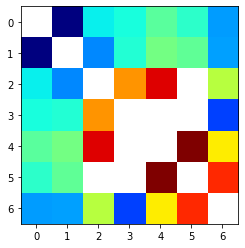

In [44]:
import matplotlib.pyplot as plt
plt.imshow(matrix,plt.cm.jet)